# Utiliser un langage de programmation pour effectuer le bilan énergétique d’un système en mouvement.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Calcul du vecteur vitesse

$v_{x}[i] = \dfrac{x_{[i+1]} - x_{[i]}} {t_{[i+1]} - t_{[i]}}$

$v_{y}[i] = \dfrac{y_{[i+1]} - y_{[i]}} {t_{[i+1]} - t_{[i]}}$



On donne une valeur arbitrairement nulle à la dernière valeur de v (pour conserver la même taille de données)

In [2]:
def vitesse(x, y, t):
    """ calcul des coordonnées de v """
    vx = []
    for i in range(len(x)-1):
        vx.append((x[i+1] - x[i]) / (t[i+1] - t[i]))
    vx.append(0)

    vy = []
    for i in range(len(y)-1):
        vy.append((y[i+1] - y[i]) / (t[i+1] - t[i]))
    vy.append(0)
    return vx, vy

# Mouvement parabolique (théorie)
On considère une bille lancée d'une hauteur $h$, avec un angle $\alpha$ par rapport à l'horizontale, et une vitesse intiale $v_0$.

In [3]:
# hauteur de lancement (m)
h = 5
# angle en degré, puis conversion en radians
alpha = 40
alpha = np.radians(alpha) 
# vitesse initiale (m/s)
v0 = 20
# intensité de la pesanteur (m/s2)
g = 9.8
# masse (kg)
m = 1 

In [4]:
# création des instants
t = np.linspace(0, 3, 50)

In [5]:
# coordonnées de positions (x, y) en fonction du temps
x = v0 * np.cos(alpha) * t

y = -0.5 * g * t**2 + v0 * np.sin(alpha) * t + h

# équation de la trajectoire
traj = -0.5 * g * (x / (v0 * np.cos(alpha)))**2 + np.tan(alpha) * x + h

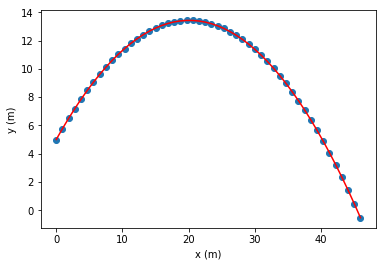

In [6]:
plt.scatter(x, y)
plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.plot(x, traj, 'red')

### Calcul des énergies cinétique, potentielle et mécanique
$E_c = \dfrac{1}{2} \times m \times v^2$

$E_p = m \times g \times y$

$E_m = E_c + E_p$

In [7]:
def Ep(y, t, m):
    return m * g * y

def Ec(x, y, t, m):
    vx, vy = vitesse(x, y, t)
    # vx, vy sont des listes, à convertir éventuellement en np.array()
    v = np.sqrt(np.array(vx)**2 + np.array(vy)**2)
    return 0.5*m*v**2

def Em(x, y, t, m):
    return Ec(x, y, t, m) + Ep(y, t, m)

In [8]:
ec, ep, em = Ec(x, y, t, m), Ep(y, t, m), Em(x, y, t, m)

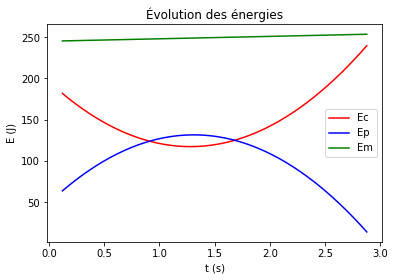

In [9]:
# on ne "plotte" pas les points aux extrémités à cause de la modélisation choisie pour le calcul de v au départ
plt.plot(t[2:-2], ec[2:-2], 'red', label='Ec')
plt.plot(t[2:-2], ep[2:-2], 'blue', label='Ep')
plt.plot(t[2:-2], em[2:-2], 'green', label='Em')

plt.xlabel('t (s)')
plt.ylabel('E (J)')

plt.title('Évolution des énergies')
plt.legend()